In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
# Loads the aligned trajectory
import MDAnalysis as mda
ref = mda.Universe('../sarscov2-10921231-structure/protein_conf.gro')
sim = mda.Universe('../sarscov2-10921231-structure/protein_conf.gro', \
                   '../traj_protein_snap_every1ns/protein_snap_every1ns_00to02us.xtc', \
                   '../traj_protein_snap_every1ns/protein_snap_every1ns_02to04us.xtc', \
                   '../traj_protein_snap_every1ns/protein_snap_every1ns_04to06us.xtc', \
                   '../traj_protein_snap_every1ns/protein_snap_every1ns_06to08us.xtc', \
                   '../traj_protein_snap_every1ns/protein_snap_every1ns_08to10us.xtc')

# Principal components analysis

In [3]:
import MDAnalysis.analysis.pca as pca
nresidues = 306
sim_pca = pca.PCA(sim, select=f'protein and name CA and resid 1-{nresidues}')
sim_pca.run(start=0)

## Visualize the principal components

<IPython.core.display.Javascript object>


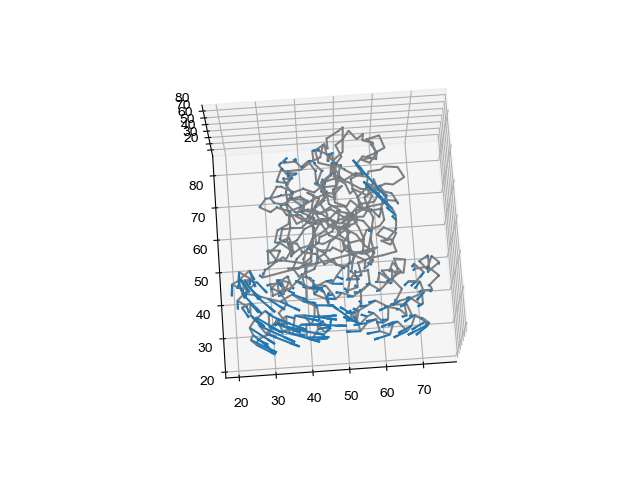

<IPython.core.display.Javascript object>


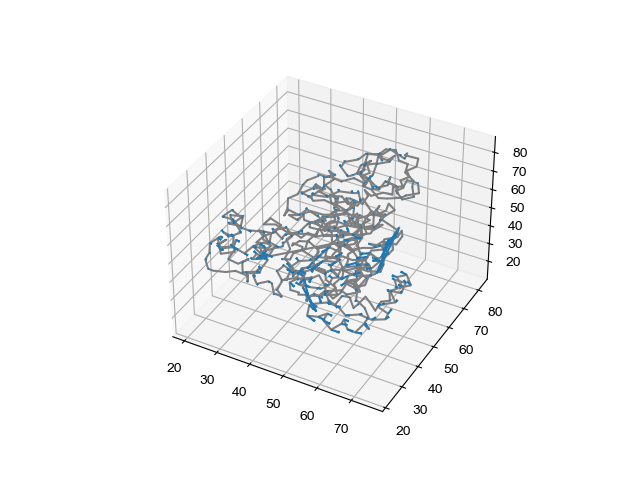

<IPython.core.display.Javascript object>


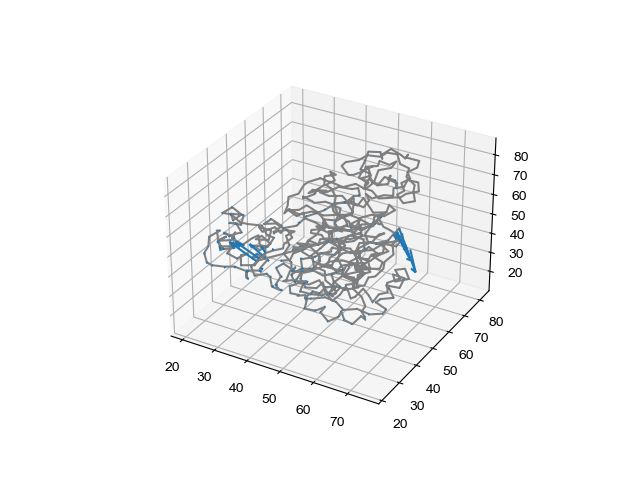

In [4]:
import numpy as np

X = sim_pca.mean[::3]
Y = sim_pca.mean[1::3]
Z = sim_pca.mean[2::3]

for n in range(3):
  U = sim_pca.p_components[::3,n]
  V = sim_pca.p_components[1::3,n]
  W = sim_pca.p_components[2::3,n]

  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure(n+1)
  ax = fig.add_subplot(111, projection='3d')
#   ax = plt.axes(projection='3d')

  lengths = [np.sqrt(u**2 + v**2 + w**2) for (u, v, w) in zip(U, V, W)]

  ax.plot3D(X,Y,Z,'gray')
  for (x, y, z, u, v, w) in zip(X, Y, Z, U, V, W):
    length = np.sqrt(u**2 + v**2 + w**2)
    ax.quiver(x, y, z, u, v, w, length=100*length/np.max(lengths), pivot='tail')

<IPython.core.display.Javascript object>


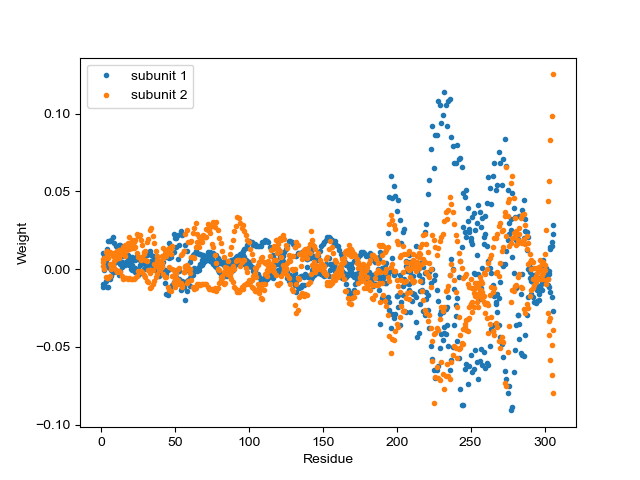

<IPython.core.display.Javascript object>


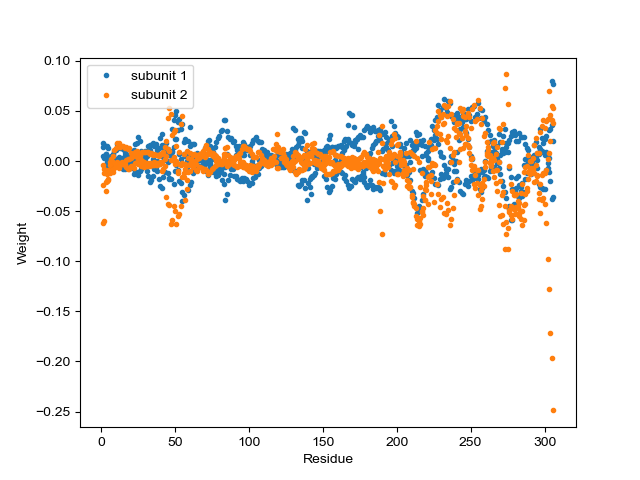

<IPython.core.display.Javascript object>


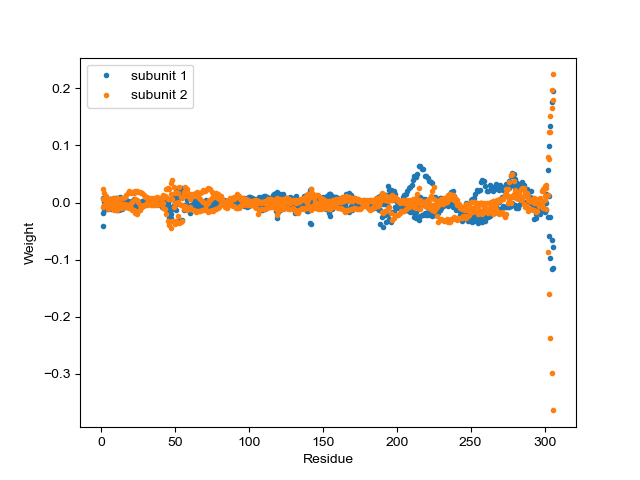

In [5]:
resid = list(np.repeat(range(1,nresidues+1),3))
for n in range(3):
  plt.figure()
  plt.plot(resid, sim_pca.p_components[:nresidues*3,n], '.')
  plt.plot(resid, sim_pca.p_components[nresidues*3:,n], '.')
  plt.legend(['subunit 1','subunit 2'])
  plt.xlabel('Residue')
  plt.ylabel('Weight')

In [6]:
import numpy as np
print('The dot product of the first PC with itself is', np.dot(sim_pca.p_components[:,0],sim_pca.p_components[:,0]))
print('The dot product of the first and second PCs is', np.dot(sim_pca.p_components[:,0],sim_pca.p_components[:,1]))

The dot product of the first PC with itself is 1.0000000000000002
The dot product of the first and second PCs is -4.193694003173931e-16


## The variance and cumulated variance

<IPython.core.display.Javascript object>


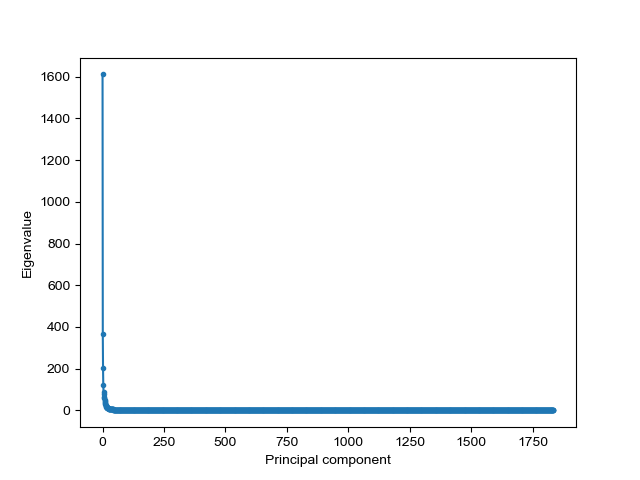

Text(0, 0.5, 'Eigenvalue')

In [7]:
plt.figure()
plt.plot(sim_pca.variance,'.-')
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')

<IPython.core.display.Javascript object>


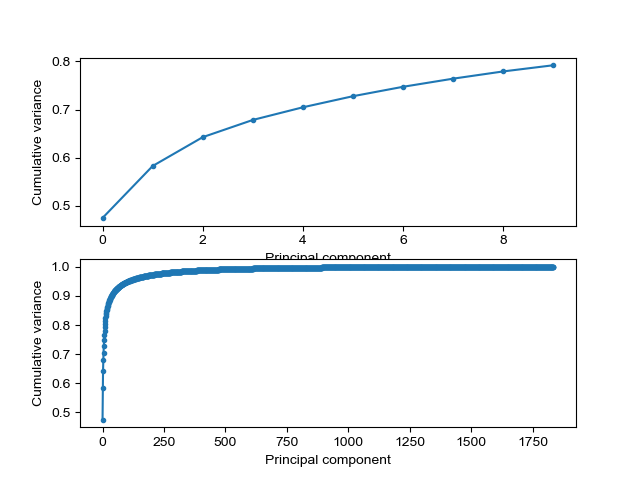

In [8]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(sim_pca.cumulated_variance[:10],'.-')
plt.xlabel('Principal component');
plt.ylabel('Cumulative variance');
plt.subplot(2,1,2)
plt.plot(sim_pca.cumulated_variance,'.-')
plt.xlabel('Principal component');
plt.ylabel('Cumulative variance');

## Projections onto the most important principal components

In [9]:
atomgroup = sim.select_atoms(f'protein and name CA and resid 1-{nresidues}')
pca_space = sim_pca.transform(atomgroup, n_components=10)

<IPython.core.display.Javascript object>


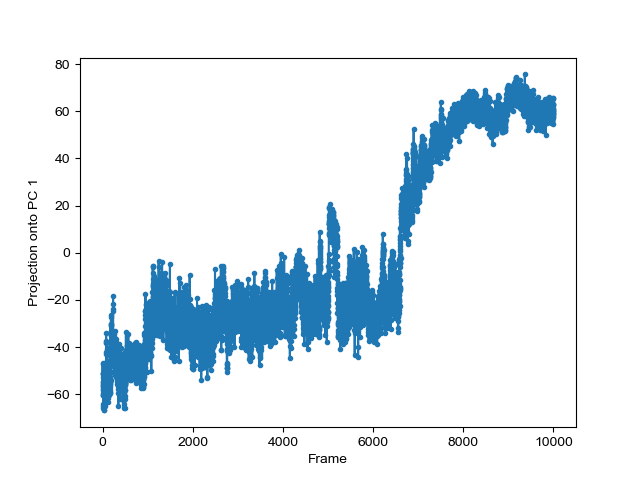

<IPython.core.display.Javascript object>


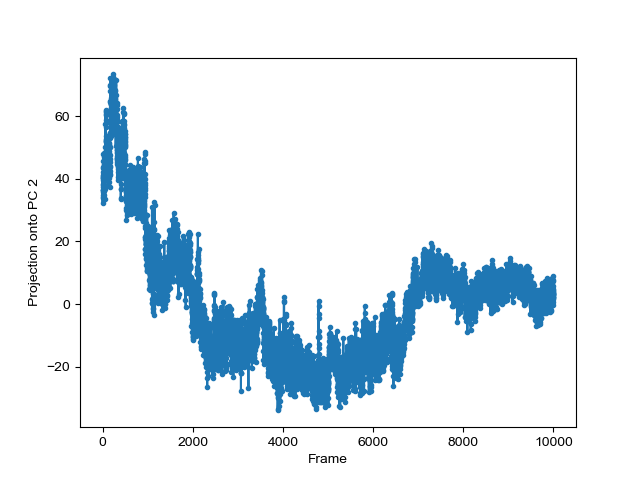

<IPython.core.display.Javascript object>


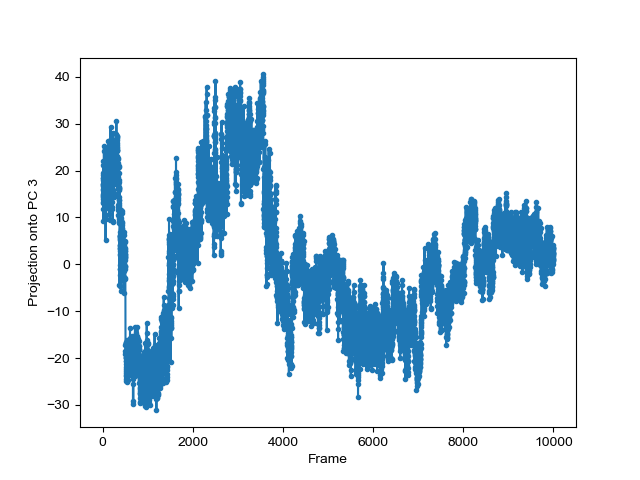

<IPython.core.display.Javascript object>


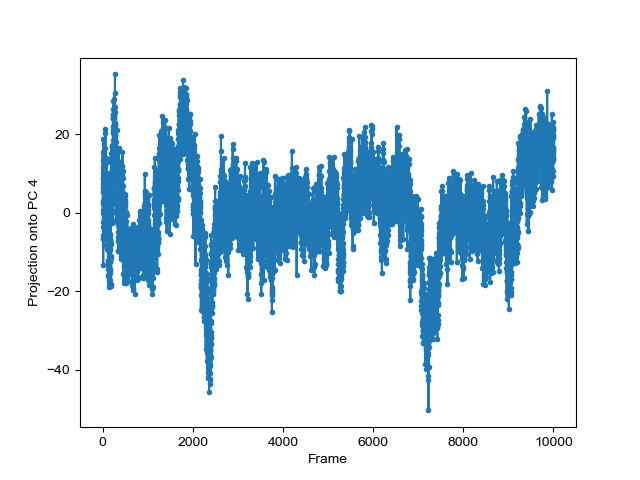

<IPython.core.display.Javascript object>


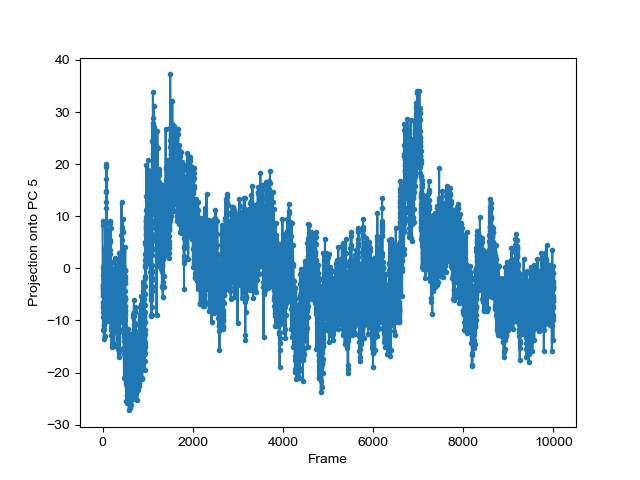

In [10]:
for n in range(5):
  plt.figure()
  plt.plot(pca_space[:,n],'.-')
  plt.xlabel('Frame')
  plt.ylabel(f'Projection onto PC {n+1}')

<IPython.core.display.Javascript object>


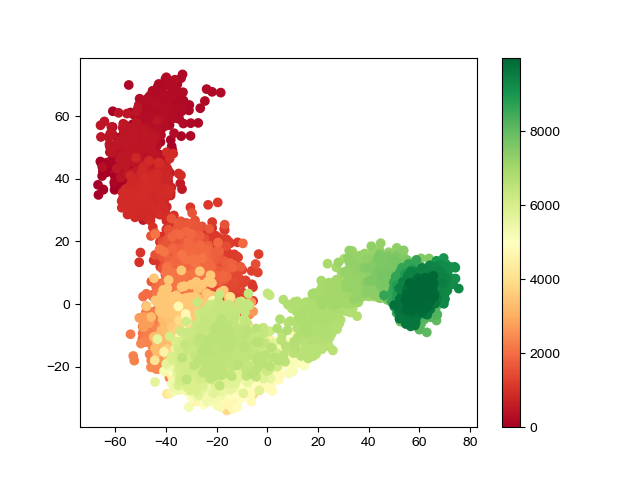

In [11]:
plt.figure()
plt.scatter(pca_space[:,0], pca_space[:,1], c=range(pca_space.shape[0]), cmap="RdYlGn")
plt.colorbar()